In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the data
# Dataframe
path_df = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)
    
# features
path_features = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features.pickle"
with open(path_features, 'rb') as data:
    features = pickle.load(data)
    

# features_train
path_features_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
#Cross-Validation for Hyperparameter tuning

#see what hyperparameters the model we want to tune has
rf = RandomForestClassifier(random_state = 8)
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [3]:
# Grid Search Cross Validation
#defining the grid for the parameters we will tune 

# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=8,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)


Fitting 8 folds for each of 1080 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 112.1min finished


GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                   

In [4]:
# see the best hyperparameters resulting from the Random Search
print("The best hyperparameters from Random Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Random Search are:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.7361111111111112


In [5]:
#saving the model in best_rfc
best_rfc = grid_search.best_estimator_
best_rfc


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

Training Accuracy: 0.52 (+/- 0.28)
Test Accuracy: 0.45 (+/- 0.07)
Training Accuracy: 0.63 (+/- 0.19)
Test Accuracy: 0.43 (+/- 0.23)
Training Accuracy: 0.66 (+/- 0.12)
Test Accuracy: 0.19 (+/- 0.13)
Training Accuracy: 0.67 (+/- 0.06)
Test Accuracy: 0.29 (+/- 0.23)
####################################################################################################
Accuracy on training set: 0.67 (+/- 0.06)


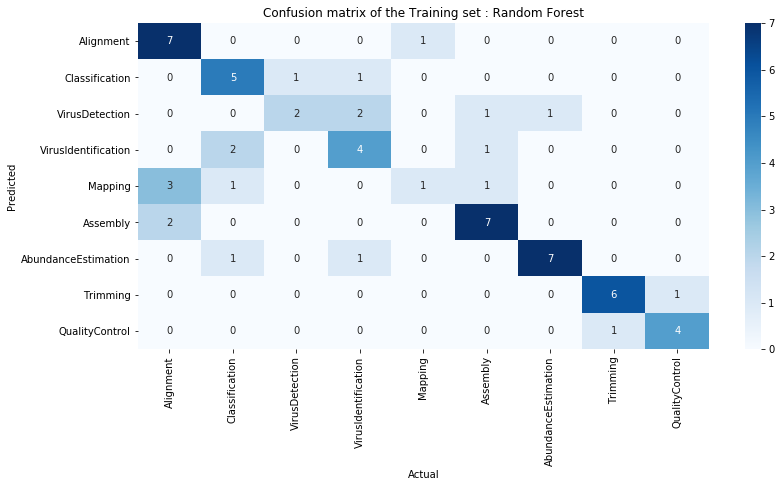

Accuracy on test set: 0.29 (+/- 0.23)


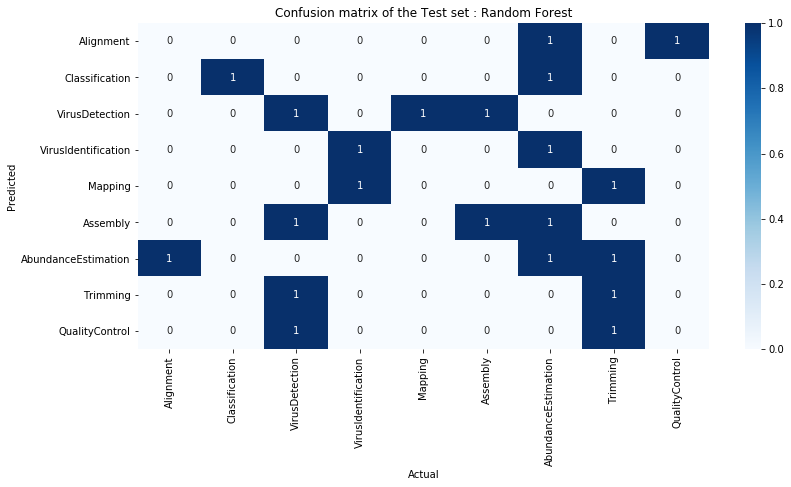

Accuracy on wole data set: 0.71 (+/- 0.04)


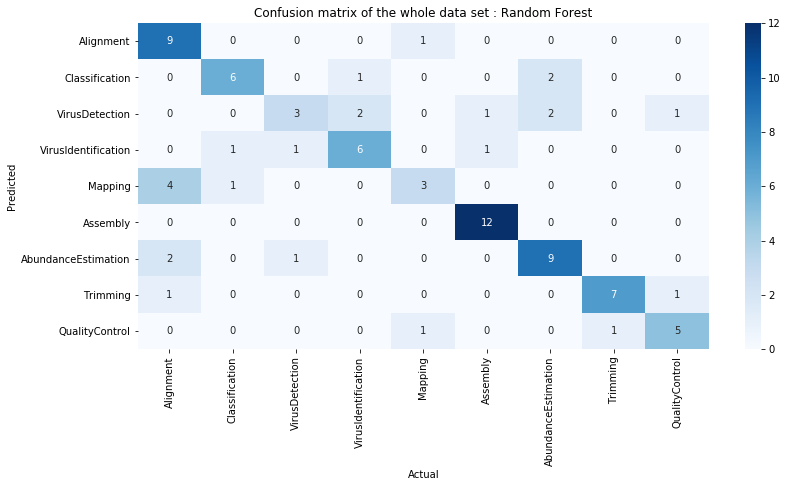

In [6]:
# Stratified cross validation

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

labels = df['Category_Code']



# stratified 4 fold crosss validation

skf = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)
skf.get_n_splits(features)
for train_index, test_index in skf.split(features, labels):

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    rfc_fit = best_rfc.fit(X_train, y_train)
    rfc_pred = best_rfc.predict(X_test)
    #confidence interval training set
    scores = cross_val_score(rfc_fit, X_train, y_train, cv=3, scoring='accuracy')
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

     #confidence interval test set
    scores = cross_val_score(rfc_fit, X_test, y_test, cv=3, scoring='accuracy')
    print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



# Training set performance
#confidence interval 
scores = cross_val_score(rfc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy on training set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(rfc_fit, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Training set : Random Forest')
plt.show()




# Test set performance
#confidence interval 
scores = cross_val_score(rfc_fit, X_test, y_test, cv=3, scoring='accuracy')
print("Accuracy on test set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(rfc_fit, X_test, y_test, cv=3)
conf_mat = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Test set : Random Forest')
plt.show()


# whole data set performance
#confidence interval 
scores = cross_val_score(rfc_fit, features, labels, cv=3, scoring='accuracy')
print("Accuracy on wole data set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(rfc_fit, features, labels, cv=3)
conf_mat = confusion_matrix(labels, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the whole data set : Random Forest')
plt.show()

In [7]:
# checking if the hyperparameter tuning process has returned a better model
# base model
base_model = RandomForestClassifier(random_state = 8)
scores_base = cross_val_score(base_model, features, labels, cv=10, scoring='accuracy')
print("base model accuracy: %0.2f (+/- %0.2f)" % (scores_base.mean(), scores_base.std() * 2))
# tuned model
scores_tuned = cross_val_score(best_rfc, features, labels, cv=10, scoring='accuracy')
print("tuned model accuracy: %0.2f (+/- %0.2f)" % (scores_tuned.mean(), scores_tuned.std() * 2))


base model accuracy: 0.73 (+/- 0.40)
tuned model accuracy: 0.72 (+/- 0.32)
